In [1]:
# This is the code to reorganize the total sales csv provided by kenvue
import pandas as pd

In [2]:
# Loading the CSV data. I declared row 0 as header.  The data begins in row 1.
df = pd.read_csv('~/Desktop/kenvue_data/Total Sales - UTSC Lecture.csv', header=[0])

In [3]:
# Let's see what it looks like
df

,Fiscal Year,Fiscal Week,Need State 1,Need State 2,Need State 3,Need State 4,Need State 5
0,2021,1,132818.25,251858.25,209473.50,373678.50,246819.75
1,2021,2,395708.25,510633.75,683112.00,597628.50,465099.75
2,2021,3,207779.25,525278.25,627825.75,300238.50,548790.75
3,2021,4,323169.75,480166.50,318566.25,319001.25,553418.25
4,2021,5,71536.50,304409.25,439665.00,433508.25,323542.50
...,...,...,...,...,...,...,...
144,2023,41,550887.00,221686.50,121078.50,240855.75,600489.00
145,2023,42,905002.50,523613.25,377325.75,529374.75,1061086.50
146,2023,43,196313.25,17168.25,19847.25,22635.00,73047.00
147,2023,46,0.00,0.00,0.00,0.00,0.00


In [4]:
# This Data is already fairly clean, but I to get the Need states into a column, This seems like this can be done by stacking the need states
# unsure why only 5 need states in this data set but dosnt change process
df.columns

Index(['Fiscal Year', 'Fiscal Week', 'Need State 1', 'Need State 2',
       'Need State 3', 'Need State 4', 'Need State 5'],
      dtype='object')

In [5]:
#Need to set the index to be the Fiscal year/Fiscal week column since only the needstates need to be stacked
df2 = df.set_index([('Fiscal Year'),('Fiscal Week')])

In [6]:
df2

Need State 1  Need State 2  Need State 3  \
Fiscal Year Fiscal Week                                             
2021        1               132818.25     251858.25     209473.50   
            2               395708.25     510633.75     683112.00   
            3               207779.25     525278.25     627825.75   
            4               323169.75     480166.50     318566.25   
            5                71536.50     304409.25     439665.00   
...                               ...           ...           ...   
2023        41              550887.00     221686.50     121078.50   
            42              905002.50     523613.25     377325.75   
            43              196313.25      17168.25      19847.25   
            46                   0.00          0.00          0.00   
            50                   0.00          0.00          0.00   

                         Need State 4  Need State 5  
Fiscal Year Fiscal Week                              
2021        1               373678.50     246819.75  
            2               597628.50     465099.75  
            3               300238.50     548790.75  
            4               319001.25     553418.25  
            5               433508.25     323542.50  
...                               ...           ...  
2023        41              240855.75     600489.00  
            42              529374.75    1061086.50  
            43               22635.00      73047.00  
            46                   0.00          0.00  
            50                   0.00          0.00  

[149 rows x 5 columns]

In [7]:
#Now i stack the need states
df2 = df2.stack(0)

In [8]:
df2

Fiscal Year  Fiscal Week              
2021         1            Need State 1    132818.25
                          Need State 2    251858.25
                          Need State 3    209473.50
                          Need State 4    373678.50
                          Need State 5    246819.75
                                            ...    
2023         50           Need State 1         0.00
                          Need State 2         0.00
                          Need State 3         0.00
                          Need State 4         0.00
                          Need State 5         0.00
Length: 745, dtype: float64

In [9]:
# Now I will reset the index so it will go back to numbers as row index
df2 = df2.reset_index()

In [10]:
#This looks good
df2

,Fiscal Year,Fiscal Week,level_2,0
0,2021,1,Need State 1,132818.25
1,2021,1,Need State 2,251858.25
2,2021,1,Need State 3,209473.50
3,2021,1,Need State 4,373678.50
4,2021,1,Need State 5,246819.75
...,...,...,...,...
740,2023,50,Need State 1,0.00
741,2023,50,Need State 2,0.00
742,2023,50,Need State 3,0.00
743,2023,50,Need State 4,0.00


In [11]:
# Let's rename the columns to match the rest of the data we cleaned
df2 = df2.rename_axis(None, axis=1)
df2 = df2.rename(columns={df2.columns[0]: "year", df2.columns[1]: "week", df2.columns[2]: "Need States", df2.columns[3]: "Total Sales"})

In [12]:

df2

,year,week,Need States,Total Sales
0,2021,1,Need State 1,132818.25
1,2021,1,Need State 2,251858.25
2,2021,1,Need State 3,209473.50
3,2021,1,Need State 4,373678.50
4,2021,1,Need State 5,246819.75
...,...,...,...,...
740,2023,50,Need State 1,0.00
741,2023,50,Need State 2,0.00
742,2023,50,Need State 3,0.00
743,2023,50,Need State 4,0.00


In [13]:
# Lastly, use the datetime function to add a date column that resembles excel better
df2['date'] = pd.to_datetime(df2["year"].astype(str) + "-" + df2["week"].astype(str) + "-1", format='%Y-%U-%w')

In [14]:
df2

,year,week,Need States,Total Sales,date
0,2021,1,Need State 1,132818.25,2021-01-04
1,2021,1,Need State 2,251858.25,2021-01-04
2,2021,1,Need State 3,209473.50,2021-01-04
3,2021,1,Need State 4,373678.50,2021-01-04
4,2021,1,Need State 5,246819.75,2021-01-04
...,...,...,...,...,...
740,2023,50,Need State 1,0.00,2023-12-11
741,2023,50,Need State 2,0.00,2023-12-11
742,2023,50,Need State 3,0.00,2023-12-11
743,2023,50,Need State 4,0.00,2023-12-11


In [15]:
import seaborn as sns

<Axes: xlabel='date', ylabel='Total Sales'>

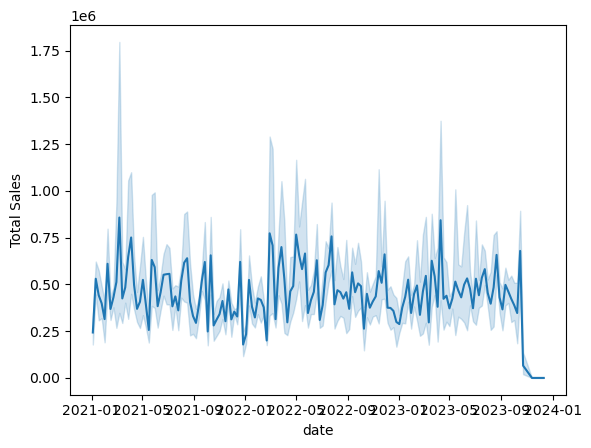

In [16]:
sns.lineplot(data = df2, x=df2.date, y='Total Sales')

<Axes: xlabel='week', ylabel='Total Sales'>

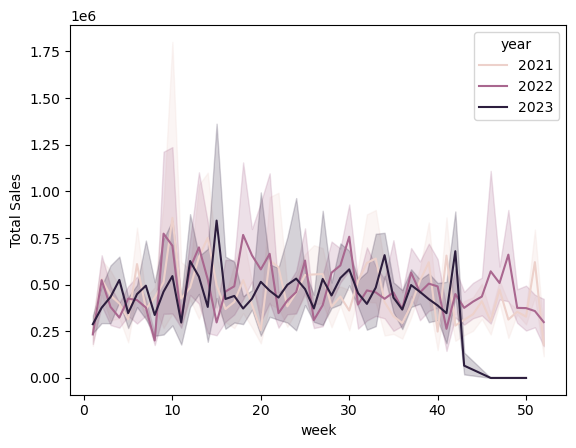

In [17]:
sns.lineplot(data = df2, x='week', y='Total Sales', hue='year')

In [18]:
#Everything looks good for this data set, time to export
df2.to_csv('~/Desktop/Total_Sales_Cleaned.csv')